In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
from keras.models import Sequential, Model
from tensorflow import keras
from keras.layers import Activation, Dense, Flatten,Reshape
tfd = tfp.distributions
from keras.models import Sequential 
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from keras import models
tfb = tfp.bijectors
tfpl = tfp.layers
tfb = tfp.bijectors
import numpy as np
import matplotlib.pyplot as plt 

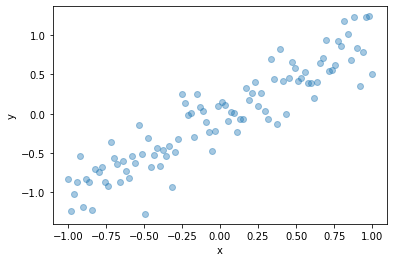

In [5]:
x_train = np.linspace(-1,1,100)[:,np.newaxis]
y_train = x_train + 0.3*np.random.randn(100)[:,np.newaxis]

plt.scatter(x_train,y_train, alpha=0.4)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [35]:
# model = Sequential([
#     Dense(units =1+1, input_shape = (1,)),
#     tfpl.DistributionLambda(lambda t: tfd.Independent(tfd.Normal(
#         loc = t[...,:1], scale = tf.math.softplus(t[..., 1:]))))
# ])

event_shape = 1
model = Sequential([
    Dense(units = tfpl.IndependentNormal.params_size(event_shape), input_shape = (1,)),
    tfpl.IndependentNormal(event_shape)
])




model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 4         
_________________________________________________________________
independent_normal_1 (Indepe multiple                  0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# Modelling Aleatoric Uncertainty

In [45]:
def nll(y_true, y_pred):
    return -y_pred.log_prob(y_true)

model.compile(loss = nll, optimizer = RMSprop(learning_rate = 0.005))
model.fit(x_train, y_train, epochs = 200, verbose = False)

# sample from the model

In [37]:
y_model = model(x_train)


In [38]:
y_sample = y_model.sample()

In [39]:
y_hat = y_model.mean()

In [40]:
y_sd = y_model.stddev()

In [41]:
y_hat_m2sd = y_hat - 2*y_sd
y_hat_p2sd = y_hat + 2*y_sd

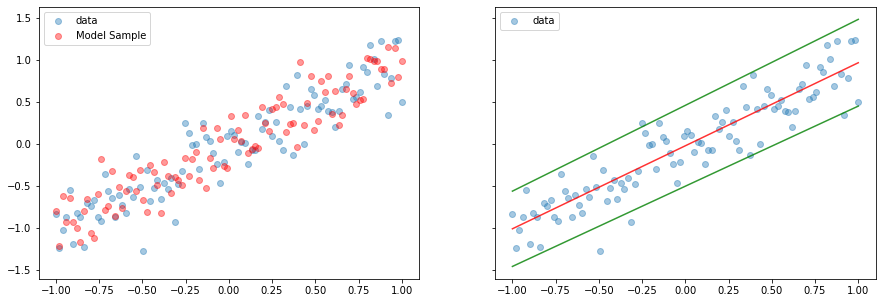

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5),
                             sharey = True)

ax1.scatter(x_train, y_train, alpha = 0.4, label = "data" )
ax1.scatter(x_train, y_sample, alpha = 0.4, color = "red",
           label = "Model Sample")
ax1.legend()
ax2.scatter(x_train, y_train, alpha = 0.4, label = "data" )
ax2.plot(x_train, y_hat, color = "red", alpha = 0.8)
ax2.plot(x_train, y_hat_m2sd, color = "green", alpha = 0.8)
ax2.plot(x_train, y_hat_p2sd, color = "green", alpha = 0.8)
plt.legend()
plt.show()